### importacion de librerias necesarias

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



### Extraer los datos 

In [3]:
df = pd.read_json('../data/MLA_100k.jsonlines', lines=True)

In [4]:
df.head()

,seller_address,warranty,sub_status,condition,seller_contact,deal_ids,base_price,shipping,non_mercado_pago_payment_methods,seller_id,...,status,video_id,catalog_product_id,subtitle,initial_quantity,start_time,permalink,geolocation,sold_quantity,available_quantity
0,"{'comment': '', 'longitude': -58.3986709, 'id'...",None,[],new,None,[],80.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",74952096,...,active,None,NaN,NaN,1,2015-09-05 20:42:53+00:00,http://articulo.mercadolibre.com.ar/MLA-578052...,"{'latitude': -34.6280698, 'longitude': -58.398...",0,1
1,"{'comment': '', 'longitude': -58.5059173, 'id'...",NUESTRA REPUTACION,[],used,None,[],2650.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",42093335,...,active,None,NaN,NaN,1,2015-09-26 18:08:30+00:00,http://articulo.mercadolibre.com.ar/MLA-581565...,"{'latitude': -34.5935524, 'longitude': -58.505...",0,1
2,"{'comment': '', 'longitude': -58.4143948, 'id'...",None,[],used,None,[],60.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",133384258,...,active,None,NaN,NaN,1,2015-09-09 23:57:07+00:00,http://articulo.mercadolibre.com.ar/MLA-578780...,"{'latitude': -34.6233907, 'longitude': -58.414...",0,1
3,"{'comment': '', 'longitude': -58.4929208, 'id'...",None,[],new,None,[],580.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",143001605,...,active,None,NaN,NaN,1,2015-09-28 18:47:56+00:00,http://articulo.mercadolibre.com.ar/MLA-581877...,"{'latitude': -34.6281894, 'longitude': -58.492...",0,1
4,"{'comment': '', 'longitude': -58.5495042, 'id'...",MI REPUTACION.,[],used,None,[],30.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",96873449,...,active,None,NaN,NaN,1,2015-08-24 22:07:20+00:00,http://articulo.mercadolibre.com.ar/MLA-576112...,"{'latitude': -34.6346547, 'longitude': -58.549...",0,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 48 columns):
 #   Column                            Non-Null Count   Dtype              
---  ------                            --------------   -----              
 0   seller_address                    100000 non-null  object             
 1   warranty                          39104 non-null   object             
 2   sub_status                        100000 non-null  object             
 3   condition                         100000 non-null  object             
 4   seller_contact                    2219 non-null    object             
 5   deal_ids                          100000 non-null  object             
 6   base_price                        100000 non-null  float64            
 7   shipping                          100000 non-null  object             
 8   non_mercado_pago_payment_methods  100000 non-null  object             
 9   seller_id                         100000 non-null

In [6]:
df.columns

Index(['seller_address', 'warranty', 'sub_status', 'condition',
       'seller_contact', 'deal_ids', 'base_price', 'shipping',
       'non_mercado_pago_payment_methods', 'seller_id', 'variations',
       'location', 'site_id', 'listing_type_id', 'price', 'attributes',
       'buying_mode', 'tags', 'listing_source', 'parent_item_id',
       'coverage_areas', 'category_id', 'descriptions', 'last_updated',
       'international_delivery_mode', 'pictures', 'id', 'official_store_id',
       'differential_pricing', 'accepts_mercadopago', 'original_price',
       'currency_id', 'thumbnail', 'title', 'automatic_relist', 'date_created',
       'secure_thumbnail', 'stop_time', 'status', 'video_id',
       'catalog_product_id', 'subtitle', 'initial_quantity', 'start_time',
       'permalink', 'geolocation', 'sold_quantity', 'available_quantity'],
      dtype='object')

In [7]:
df.describe()

,base_price,seller_id,price,official_store_id,differential_pricing,original_price,catalog_product_id,subtitle,initial_quantity,sold_quantity,available_quantity
count,1.000000e+05,1.000000e+05,1.000000e+05,818.000000,0.0,143.000000,1.100000e+01,0.0,100000.000000,100000.000000,100000.000000
mean,5.252423e+04,8.425269e+07,5.252433e+04,206.443765,NaN,1593.341958,3.727643e+06,NaN,35.093370,2.396990,34.842380
std,8.623127e+06,5.497257e+07,8.623127e+06,128.252953,NaN,2245.798072,1.884698e+06,NaN,421.076196,42.685077,420.808403
min,8.400000e-01,1.304000e+03,8.400000e-01,1.000000,NaN,120.000000,9.440400e+04,NaN,1.000000,0.000000,1.000000
25%,9.000000e+01,3.953591e+07,9.000000e+01,84.000000,NaN,449.000000,3.050702e+06,NaN,1.000000,0.000000,1.000000
50%,2.500000e+02,7.631063e+07,2.500000e+02,216.000000,NaN,858.000000,5.093232e+06,NaN,1.000000,0.000000,1.000000
75%,8.000000e+02,1.325659e+08,8.000000e+02,312.750000,NaN,1500.000000,5.103216e+06,NaN,2.000000,0.000000,2.000000
max,2.222222e+09,1.946906e+08,2.222222e+09,446.000000,NaN,13999.000000,5.434513e+06,NaN,9999.000000,8676.000000,9999.000000


### Análisis detallado de la variable objetivo (condition)

In [ ]:
print("Distribución de la variable 'condition':")
condition_counts = df['condition'].value_counts(normalize=True)
print(condition_counts)

Distribución de la variable 'condition':
condition
new     0.53758
used    0.46242
Name: proportion, dtype: float64


Observaciones:
- La variable 'condition' indica si un producto es nuevo ('new') o usado ('used').
- Proporción de clases: {'new': 0.53758, 'used': 0.46242}

### Análisis de Valores Faltantes 

In [ ]:
missing = df.isnull().sum()
missing_percent = missing / len(df) * 100
missing_df = pd.DataFrame({'Valores Faltantes': missing, 'Porcentaje (%)': missing_percent})
print("Columnas con valores faltantes:")
print(missing_df[missing_df['Valores Faltantes'] > 0])

Columnas con valores faltantes:
                      Valores Faltantes  Porcentaje (%)
warranty                          60896          60.896
seller_contact                    97781          97.781
parent_item_id                    23011          23.011
official_store_id                 99182          99.182
differential_pricing             100000         100.000
original_price                    99857          99.857
video_id                          97015          97.015
catalog_product_id                99989          99.989
subtitle                         100000         100.000


Decisiones sobre valores faltantes:
- Columnas con >90% de valores faltantes (differential_pricing, subtitle, catalog_product_id, original_price, official_store_id): Eliminar.
- warranty (39% no nulos): Imputar con 'No warranty' y crear variable binaria 'has_warranty'.
- seller_contact, video_id: Eliminar debido a baja completitud (<3%).
- parent_item_id (77% no nulos): Eliminar, ya que no es crítico para predecir 'condition'.

In [27]:
print(df['warranty'].value_counts())
df['warranty'].nunique()

warranty
Sí                                                                       5682
Sin garantía                                                             5442
SI                                                                        592
6 meses                                                                   547
6 MESES                                                                   397
                                                                         ... 
Garantía de un año a partir de la fecha de entrega!                         1
Garantía 1 año. La misma no incluye daños por mal uso o accidentales.       1
SE PRUEBAN LOS JUEGOS AL RETIRAR                                            1
Mi garantía son los comentarios de mis compradores.                         1
Pueden variar matasellos                                                    1
Name: count, Length: 10264, dtype: int64


10264

### Aplanamiento de Datos Anidados y Características Derivadas

In [14]:
# Extraer ciudad y estado del vendedor
def extract_seller_city(address):
    return address.get('city', {}).get('name', 'Unknown')

def extract_seller_state(address):
    return address.get('state', {}).get('name', 'Unknown')

# Extraer número de fotos
def extract_num_pictures(pictures):
    return len(pictures) if isinstance(pictures, list) else 0

# Extraer número de métodos de pago no-MercadoPago
def extract_num_payment_methods(methods):
    return len(methods) if isinstance(methods, list) else 0

# Extraer flags de envío
def extract_free_shipping(shipping):
    return shipping.get('free_shipping', False)

def extract_local_pick_up(shipping):
    return shipping.get('local_pick_up', False)

# Aplicar funciones
df['seller_city'] = df['seller_address'].apply(extract_seller_city)
df['seller_state'] = df['seller_address'].apply(extract_seller_state)
df['free_shipping'] = df['shipping'].apply(extract_free_shipping)
df['local_pick_up'] = df['shipping'].apply(extract_local_pick_up)
df['num_payment_methods'] = df['non_mercado_pago_payment_methods'].apply(extract_num_payment_methods)
df['num_pictures'] = df['pictures'].apply(extract_num_pictures)
df['title_length'] = df['title'].apply(lambda x: len(str(x)))
df['has_warranty'] = df['warranty'].apply(lambda x: 0 if pd.isna(x) or x == '' else 1)
df['sales_ratio'] = df['sold_quantity'] / df['initial_quantity'].replace(0, 1)  # Evitar división por cero


Nuevas características:
- seller_city, seller_state: Extraídas de seller_address (city.name, state.name).
- free_shipping, local_pick_up: Extraídas de shipping.
- num_payment_methods: Número de métodos de pago alternativos.
- num_pictures: Número de imágenes.
- title_length: Longitud del título.
- has_warranty: 1 si warranty no es 'No warranty', 0 si lo es.
- sales_ratio: Proporción de ventas (sold_quantity / initial_quantity).


### Análisis de Características Numéricas

In [ ]:
numeric_cols = ['price', 'base_price', 'sold_quantity', 'available_quantity', 'initial_quantity', 'num_pictures', 'num_payment_methods', 'title_length']
print("Estadísticas de variables numéricas:")
print(df[numeric_cols].describe())

Estadísticas de variables numéricas:
              price    base_price  sold_quantity  available_quantity  \
count  1.000000e+05  1.000000e+05  100000.000000       100000.000000   
mean   5.252433e+04  5.252423e+04       2.396990           34.842380   
std    8.623127e+06  8.623127e+06      42.685077          420.808403   
min    8.400000e-01  8.400000e-01       0.000000            1.000000   
25%    9.000000e+01  9.000000e+01       0.000000            1.000000   
50%    2.500000e+02  2.500000e+02       0.000000            1.000000   
75%    8.000000e+02  8.000000e+02       0.000000            2.000000   
max    2.222222e+09  2.222222e+09    8676.000000         9999.000000   

       initial_quantity   num_pictures  num_payment_methods  title_length  
count     100000.000000  100000.000000        100000.000000  100000.00000  
mean          35.093370       2.931360             1.583320      45.34194  
std          421.076196       2.102825             1.411141      12.99620  
min       

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

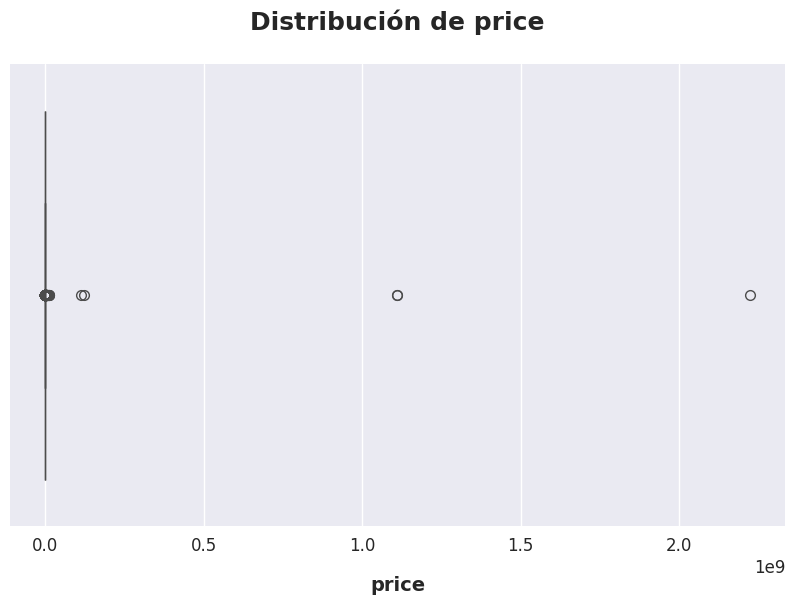

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

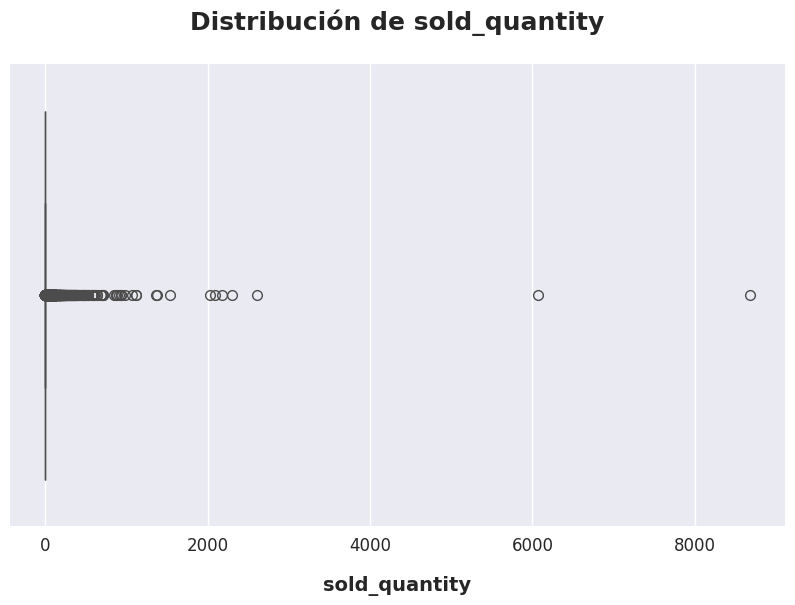

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

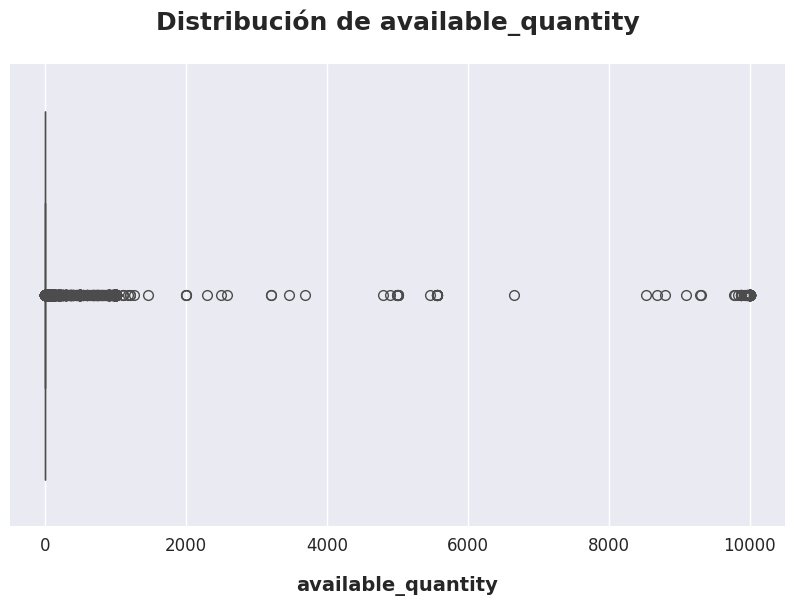

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

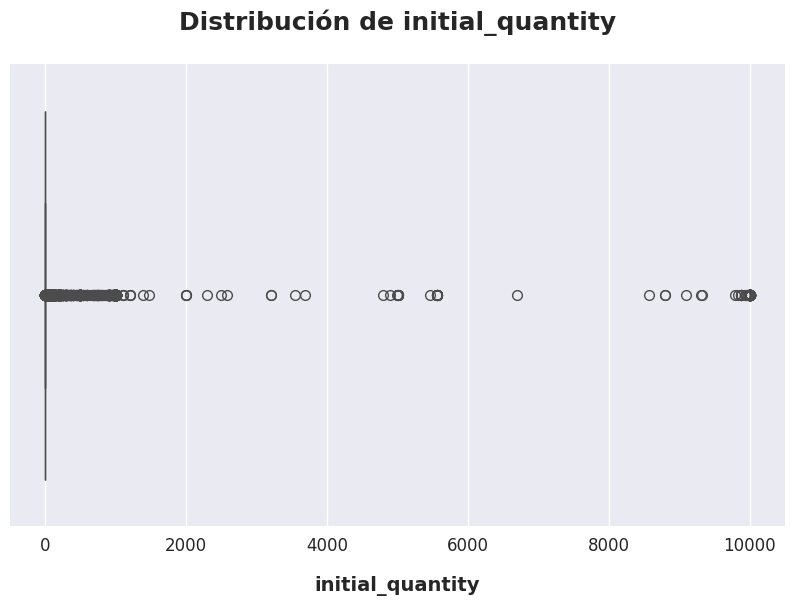

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

features_to_plot = ['price', 'sold_quantity', 'available_quantity', 'initial_quantity']
for col in features_to_plot:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f'Distribución de {col}')
    plt.show()


In [16]:
print("\nCorrelaciones:")
corr_matrix = df[numeric_cols].corr()
print(corr_matrix)


Correlaciones:
                        price  base_price  sold_quantity  available_quantity  \
price                1.000000    1.000000      -0.000337           -0.000359   
base_price           1.000000    1.000000      -0.000337           -0.000359   
sold_quantity       -0.000337   -0.000337       1.000000            0.051786   
available_quantity  -0.000359   -0.000359       0.051786            1.000000   
initial_quantity    -0.000362   -0.000362       0.057291            0.999948   
num_pictures         0.006056    0.006056       0.025265            0.023426   
num_payment_methods -0.003014   -0.003014       0.027251            0.018778   
title_length        -0.003520   -0.003520       0.029332            0.046390   

                     initial_quantity  num_pictures  num_payment_methods  \
price                       -0.000362      0.006056            -0.003014   
base_price                  -0.000362      0.006056            -0.003014   
sold_quantity                0.0572